In [2]:
import pickle
import os
import pandas as pd
!pip install pandana
import pandana as pdn
import numpy as np

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 9.9 MB/s eta 0:00:00


In [5]:
# Eskuzaitzeta data
trips_ez = pd.read_csv('../input_data/workers_eskuzaitzeta.csv')
trips_ez

,Unnamed: 0,Com_Ori,Com_Des,Mun_Ori,Mun_Des,Modo,Hora_Ini,Recur,Municipio,Per_hog,...,Sexo,Edad,Actividad,crnt_tur,Año,Income,O_long,O_lat,D_long,D_lat
0,0,Donostialdea,Donostialdea,Oiartzun,Errenteria,Coche conductor,14:50,22,Oiartzun,2,...,2,3,1,1,2021,23763.435,-1.869476,43.299272,-2.033693,43.256347
1,1,Urola Kosta,Donostialdea,Orio,Andoain,Coche conductor,20:40,22,Orio,1,...,1,4,1,1,2021,25309.110,-2.128351,43.276954,-2.033693,43.256347
2,2,Donostialdea,Donostialdea,Donostia/San Sebastian,Hernani,Coche conductor,20:00,22,Hernani,1,...,2,5,1,1,2021,22911.920,-1.977797,43.303195,-2.033693,43.256347
3,3,Debagoiena,Donostialdea,Bergara,Usurbil,Coche conductor,15:00,22,Usurbil,2,...,2,4,1,1,2021,25997.260,-2.423608,43.104149,-2.033693,43.256347
4,4,Donostialdea,Donostialdea,Donostia/San Sebastian,Urnieta,Coche conductor,14:00,23,Urnieta,2,...,1,5,1,1,2021,28048.410,-2.019292,43.306946,-2.033693,43.256347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2457,2457,Bidasoa,Donostialdea,Irun,Oiartzun,Coche conductor,13:00,22,Oiartzun,2,...,1,5,1,1,2021,25461.260,-1.761189,43.339585,-2.033693,43.256347
2458,2458,Goierri,Donostialdea,Legazpi,Donostia/San Sebastian,Coche conductor,08:00,99,Legazpi,1,...,1,5,1,1,2021,23463.100,-2.341281,43.059045,-2.033693,43.256347
2459,2459,Bidasoa,Donostialdea,Irun,Donostia/San Sebastian,Coche conductor,05:05,22,Irun,2,...,1,6,1,1,2021,24718.410,-1.798813,43.343189,-2.033693,43.256347
2460,2460,Donostialdea,Donostialdea,Donostia/San Sebastian,Pasaia,Andando,20:30,23,Donostia/San Sebastian,2,...,2,5,1,1,2021,22504.870,-2.003906,43.311991,-2.033693,43.256347


In [6]:
trips_ez.columns
eliminar = ['Unnamed: 0', 'Modo', 'Recur','Actividad','Año',]
trips_ez = trips_ez.drop(columns=eliminar)
trips_ez

,Com_Ori,Com_Des,Mun_Ori,Mun_Des,Hora_Ini,Municipio,Per_hog,Turismos,Motos,Tipo_familia,Sexo,Edad,crnt_tur,Income,O_long,O_lat,D_long,D_lat
0,Donostialdea,Donostialdea,Oiartzun,Errenteria,14:50,Oiartzun,2,3,2,Otros hogares con niños,2,3,1,23763.435,-1.869476,43.299272,-2.033693,43.256347
1,Urola Kosta,Donostialdea,Orio,Andoain,20:40,Orio,1,2,1,Hogar de una persona,1,4,1,25309.110,-2.128351,43.276954,-2.033693,43.256347
2,Donostialdea,Donostialdea,Donostia/San Sebastian,Hernani,20:00,Hernani,1,2,1,Hogar de una persona,2,5,1,22911.920,-1.977797,43.303195,-2.033693,43.256347
3,Debagoiena,Donostialdea,Bergara,Usurbil,15:00,Usurbil,2,4,1,Otros hogares sin niños,2,4,1,25997.260,-2.423608,43.104149,-2.033693,43.256347
4,Donostialdea,Donostialdea,Donostia/San Sebastian,Urnieta,14:00,Urnieta,2,2,1,Otros hogares sin niños,1,5,1,28048.410,-2.019292,43.306946,-2.033693,43.256347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2457,Bidasoa,Donostialdea,Irun,Oiartzun,13:00,Oiartzun,2,3,1,2 adultos con niño(s),1,5,1,25461.260,-1.761189,43.339585,-2.033693,43.256347
2458,Goierri,Donostialdea,Legazpi,Donostia/San Sebastian,08:00,Legazpi,1,2,1,Hogar de una persona,1,5,1,23463.100,-2.341281,43.059045,-2.033693,43.256347
2459,Bidasoa,Donostialdea,Irun,Donostia/San Sebastian,05:05,Irun,2,2,1,2 adultos con niño(s),1,6,1,24718.410,-1.798813,43.343189,-2.033693,43.256347
2460,Donostialdea,Donostialdea,Donostia/San Sebastian,Pasaia,20:30,Donostia/San Sebastian,2,2,1,2 adultos con niño(s),2,5,1,22504.870,-2.003906,43.311991,-2.033693,43.256347


In [9]:
# Assign number to town
pueblos = pd.read_excel("../input_data/data_towns.xlsx")
eliminar = ['Region', 'Latitud', 'Longitud', 'Comarca',
       'Altitud (m.s.n.m.)', 'Superficie (kmÂ²)', 'PoblaciÃ³n (2019)',
       'Densidad (hab./kmÂ²)', 'Incluido']
pueblos = pueblos.drop(columns=eliminar)

trips_ez = pd.merge(trips_ez, pueblos, left_on='Municipio', right_on='Town')
trips_ez = trips_ez.drop(columns=['Municipio', 'Town'])
trips_ez.rename(columns={'Código': 'Municipio'}, inplace=True)

,Com_Ori,Com_Des,Mun_Ori,Mun_Des,Hora_Ini,Per_hog,Turismos,Motos,Tipo_familia,Sexo,Edad,crnt_tur,Income,O_long,O_lat,D_long,D_lat,Municipio
0,Donostialdea,Donostialdea,Oiartzun,Errenteria,14:50,2,3,2,Otros hogares con niños,2,3,1,23763.435,-1.869476,43.299272,-2.033693,43.256347,63
1,Donostialdea,Donostialdea,Pasaia,Oiartzun,07:30,2,3,1,Otros hogares con niños,2,5,1,23571.460,-1.918149,43.320613,-2.033693,43.256347,63
2,Donostialdea,Donostialdea,Donostia/San Sebastian,Oiartzun,06:00,1,2,1,Hogar de una persona,1,5,1,28815.560,-1.995303,43.305053,-2.033693,43.256347,63
3,Donostialdea,Donostialdea,Oiartzun,Errenteria,14:50,2,3,2,Otros hogares con niños,2,3,1,23763.435,-1.858357,43.297177,-2.033693,43.256347,63
4,Donostialdea,Donostialdea,Errenteria,Oiartzun,19:30,2,3,2,Otros hogares con niños,2,3,1,21396.285,-1.904071,43.319947,-2.033693,43.256347,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2436,Goierri,Donostialdea,Beasain,Lasarte-Oria,15:00,2,3,1,2 adultos con niño(s),2,5,1,23958.560,-2.199207,43.044323,-2.033693,43.256347,19
2437,Goierri,Donostialdea,Beasain,Lasarte-Oria,15:00,2,3,1,2 adultos con niño(s),2,5,1,23958.560,-2.209558,43.043715,-2.033693,43.256347,19
2438,Goierri,Donostialdea,Beasain,Lasarte-Oria,15:00,2,3,1,2 adultos con niño(s),2,5,1,23958.560,-2.209558,43.043715,-2.033693,43.256347,19
2439,Goierri,Donostialdea,Beasain,Lasarte-Oria,15:00,2,3,1,2 adultos con niño(s),2,5,1,23958.560,-2.227752,43.050290,-2.033693,43.256347,19


In [10]:
# Codify hour manually
trips_ez['Hora_Ini'] = pd.to_datetime(trips_ez['Hora_Ini'], format='%H:%M')

# Calcula la diferencia en minutos desde "00:00" y divídela por 5
trips_ez['Hora_Ini'] = ((trips_ez['Hora_Ini'] - pd.to_datetime('00:00', format='%H:%M')).dt.total_seconds() / 300).astype(int) + 1

In [11]:
trips_ez['Income_Percentile'] = trips_ez.groupby('Mun_Ori')['Income'].transform(
    lambda x: pd.qcut(x, q=4, labels=False, duplicates='drop') + 1  # labels=False to get numeric labels (1-4)
)

,Com_Ori,Com_Des,Mun_Ori,Mun_Des,Hora_Ini,Per_hog,Turismos,Motos,Tipo_familia,Sexo,Edad,crnt_tur,Income,O_long,O_lat,D_long,D_lat,Municipio,Income_Percentile
0,Donostialdea,Donostialdea,Oiartzun,Errenteria,179,2,3,2,Otros hogares con niños,2,3,1,23763.435,-1.869476,43.299272,-2.033693,43.256347,63,2.0
1,Donostialdea,Donostialdea,Pasaia,Oiartzun,91,2,3,1,Otros hogares con niños,2,5,1,23571.460,-1.918149,43.320613,-2.033693,43.256347,63,3.0
2,Donostialdea,Donostialdea,Donostia/San Sebastian,Oiartzun,73,1,2,1,Hogar de una persona,1,5,1,28815.560,-1.995303,43.305053,-2.033693,43.256347,63,4.0
3,Donostialdea,Donostialdea,Oiartzun,Errenteria,179,2,3,2,Otros hogares con niños,2,3,1,23763.435,-1.858357,43.297177,-2.033693,43.256347,63,2.0
4,Donostialdea,Donostialdea,Errenteria,Oiartzun,235,2,3,2,Otros hogares con niños,2,3,1,21396.285,-1.904071,43.319947,-2.033693,43.256347,63,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2436,Goierri,Donostialdea,Beasain,Lasarte-Oria,181,2,3,1,2 adultos con niño(s),2,5,1,23958.560,-2.199207,43.044323,-2.033693,43.256347,19,1.0
2437,Goierri,Donostialdea,Beasain,Lasarte-Oria,181,2,3,1,2 adultos con niño(s),2,5,1,23958.560,-2.209558,43.043715,-2.033693,43.256347,19,1.0
2438,Goierri,Donostialdea,Beasain,Lasarte-Oria,181,2,3,1,2 adultos con niño(s),2,5,1,23958.560,-2.209558,43.043715,-2.033693,43.256347,19,1.0
2439,Goierri,Donostialdea,Beasain,Lasarte-Oria,181,2,3,1,2 adultos con niño(s),2,5,1,23958.560,-2.227752,43.050290,-2.033693,43.256347,19,1.0


# Añadir el Travel Time

In [ ]:
networks = dict.fromkeys({
#  "walk",
 "drive",
})

for k in networks:
    print(k)
    networks[k] = pdn.network.Network.from_hdf5(f'../input_data/networks/{k}_net.h5')

# TRANSIT

transit = dict.fromkeys({
 "transit_0001",
 "transit_0102",
 "transit_0203", # walk_network because transit is not available
 "transit_0304", # walk_network because transit is not available
 "transit_0405", # walk_network because transit is not available
 "transit_0506",
 "transit_0607",
 "transit_0708",
 "transit_0809",
 "transit_0910",
 "transit_1011",
 "transit_1112",
 "transit_1213",
 "transit_1314",
 "transit_1415",
 "transit_1516",
 "transit_1617",
 "transit_1718",
 "transit_1819",
 "transit_1920",
 "transit_2021",
 "transit_2122",
 "transit_2223",
 "transit_2324",
})

for k in transit:
    print(k)
    transit[k] = pdn.network.Network.from_hdf5(f'../input_data/transit_24h/{k}.h5')

# TRAIN

train = dict.fromkeys({
 "train_0001", # walk_network because train is not available
 "train_0102", # walk_network because train is not available
 "train_0203", # walk_network because train is not available
 "train_0304", # walk_network because train is not available
 "train_0405", # walk_network because train is not available
 "train_0506",
 "train_0607",
 "train_0708",
 "train_0809",
 "train_0910",
 "train_1011",
 "train_1112",
 "train_1213",
 "train_1314",
 "train_1415",
 "train_1516",
 "train_1617",
 "train_1718",
 "train_1819",
 "train_1920",
 "train_2021",
 "train_2122",
 "train_2223",
 "train_2324",
})

for k in train:
    print(k)
    train[k] = pdn.network.Network.from_hdf5(f'../input_data/train_24h/{k}.h5')

drive
transit_1415
transit_2021
transit_0203
transit_0304
transit_1314
transit_2223
transit_2122
transit_0102
transit_0607
transit_1213
transit_0405
transit_1718
transit_0809
transit_0708
transit_1617
transit_2324
transit_1819
transit_0506
transit_1920
transit_0910
transit_1112
transit_0001
transit_1011
transit_1516
train_0405
train_1011
train_2324
train_1516
train_1314
train_0102
train_1112
train_2021
train_1920
train_0910
train_0708
train_2223
train_0809
train_2122
train_1415
train_1617
train_1819
train_1213
train_0607
train_1718
train_0203
train_0001
train_0506
train_0304


In [ ]:
# Asignar tt

trips_ez['Hora_Ini'] = trips_ez['Hora_Ini'].apply(lambda x: 1 if x < 1 else (288 if x > 288 else x))

trips_ez["drive_tt"] = networks['drive'].shortest_path_lengths(
            networks['drive'].get_node_ids(trips_ez.O_long,trips_ez.O_lat),
            networks['drive'].get_node_ids(trips_ez.D_long,trips_ez.D_lat),
            imp_name='drive_time_s'
            )
trips_ez["drive_tt"] = trips_ez["drive_tt"] / 60 # Para pasar a minutos

trips_ez["distance"] = networks['drive'].shortest_path_lengths(
            networks['drive'].get_node_ids(trips_ez.O_long,trips_ez.O_lat),
            networks['drive'].get_node_ids(trips_ez.D_long,trips_ez.D_lat),
            imp_name='distance'
            )

# trips["walk_tt"] = trips["walk_tt"] / 80.46 # Pasar de distancia (m) a minutos con un ritmo de 3 mp/h = 80.46 m/min.
# trips["bike_tt"] =  networks['drive'].shortest_path_lengths(
#             networks['drive'].get_node_ids(trips.O_long,trips.O_lat),
#             networks['drive'].get_node_ids(trips.D_long,trips.D_lat),
#             imp_name='distance'
#             )
# trips["bike_tt"] = trips["bike_tt"] * 60 / (1000*13.07)  # 13.07 km/h = 13.07*1000/60 m/min

# Add TRANSIT

for k in transit:
    trips_ez[f"{k}_tt"] = transit[k].shortest_path_lengths(
            transit[k].get_node_ids(trips_ez.O_long,trips_ez.O_lat),
            transit[k].get_node_ids(trips_ez.D_long,trips_ez.D_lat)
    )

def asignar_valor(row):
    if 1 <= row['Hora_Ini'] <= 12:
        return row['transit_0001_tt']
    elif 13 <= row['Hora_Ini'] <= 24:
        return row['transit_0102_tt']
    elif 25 <= row['Hora_Ini'] <= 36:
        return row['transit_0203_tt']
    elif 37 <= row['Hora_Ini'] <= 48:
        return row['transit_0304_tt']
    elif 49 <= row['Hora_Ini'] <= 60:
        return row['transit_0405_tt']
    elif 61 <= row['Hora_Ini'] <= 72:
        return row['transit_0506_tt']
    elif 73 <= row['Hora_Ini'] <= 84:
        return row['transit_0607_tt']
    elif 85 <= row['Hora_Ini'] <= 96:
        return row['transit_0708_tt']
    elif 97 <= row['Hora_Ini'] <= 108:
        return row['transit_0809_tt']
    elif 109 <= row['Hora_Ini'] <= 120:
        return row['transit_0910_tt']
    elif 121 <= row['Hora_Ini'] <= 132:
        return row['transit_1011_tt']
    elif 133 <= row['Hora_Ini'] <= 144:
        return row['transit_1112_tt']
    elif 145 <= row['Hora_Ini'] <= 156:
        return row['transit_1213_tt']
    elif 157 <= row['Hora_Ini'] <= 168:
        return row['transit_1314_tt']
    elif 169 <= row['Hora_Ini'] <= 180:
        return row['transit_1415_tt']
    elif 181 <= row['Hora_Ini'] <= 192:
        return row['transit_1516_tt']
    elif 193 <= row['Hora_Ini'] <= 204:
        return row['transit_1617_tt']
    elif 205 <= row['Hora_Ini'] <= 216:
        return row['transit_1718_tt']
    elif 217 <= row['Hora_Ini'] <= 228:
        return row['transit_1819_tt']
    elif 229 <= row['Hora_Ini'] <= 240:
        return row['transit_1920_tt']
    elif 241 <= row['Hora_Ini'] <= 252:
        return row['transit_2021_tt']
    elif 253 <= row['Hora_Ini'] <= 264:
        return row['transit_2122_tt']
    elif 265 <= row['Hora_Ini'] <= 276:
        return row['transit_2223_tt']
    elif 277 <= row['Hora_Ini'] <= 288:
        return row['transit_2324_tt']
    else:
        return None  
    
# Create new column
trips_ez['transit_tt'] = trips_ez.apply(asignar_valor, axis=1)

trips_ez = trips_ez.drop(columns=['transit_1314_tt',
       'transit_2122_tt', 'transit_1617_tt', 'transit_0405_tt',
       'transit_0001_tt', 'transit_1213_tt', 'transit_1415_tt',
       'transit_0910_tt', 'transit_0708_tt', 'transit_1011_tt',
       'transit_0102_tt', 'transit_1516_tt', 'transit_0506_tt',
       'transit_2021_tt', 'transit_2324_tt', 'transit_1819_tt',
       'transit_0203_tt', 'transit_0809_tt', 'transit_1718_tt',
       'transit_2223_tt', 'transit_0304_tt', 'transit_1920_tt',
       'transit_0607_tt', 'transit_1112_tt'])

# # Add TRAIN

for k in train:
    trips_ez[f"{k}_tt"] = train[k].shortest_path_lengths(
            train[k].get_node_ids(trips_ez.O_long,trips_ez.O_lat),
            train[k].get_node_ids(trips_ez.D_long,trips_ez.D_lat)
    )

def asignar_valor(row):
    if 1 <= row['Hora_Ini'] <= 12:
        return row['train_0001_tt']
    elif 13 <= row['Hora_Ini'] <= 24:
        return row['train_0102_tt']
    elif 25 <= row['Hora_Ini'] <= 36:
        return row['train_0203_tt']
    elif 37 <= row['Hora_Ini'] <= 48:
        return row['train_0304_tt']
    elif 49 <= row['Hora_Ini'] <= 60:
        return row['train_0405_tt']
    elif 61 <= row['Hora_Ini'] <= 72:
        return row['train_0506_tt']
    elif 73 <= row['Hora_Ini'] <= 84:
        return row['train_0607_tt']
    elif 85 <= row['Hora_Ini'] <= 96:
        return row['train_0708_tt']
    elif 97 <= row['Hora_Ini'] <= 108:
        return row['train_0809_tt']
    elif 109 <= row['Hora_Ini'] <= 120:
        return row['train_0910_tt']
    elif 121 <= row['Hora_Ini'] <= 132:
        return row['train_1011_tt']
    elif 133 <= row['Hora_Ini'] <= 144:
        return row['train_1112_tt']
    elif 145 <= row['Hora_Ini'] <= 156:
        return row['train_1213_tt']
    elif 157 <= row['Hora_Ini'] <= 168:
        return row['train_1314_tt']
    elif 169 <= row['Hora_Ini'] <= 180:
        return row['train_1415_tt']
    elif 181 <= row['Hora_Ini'] <= 192:
        return row['train_1516_tt']
    elif 193 <= row['Hora_Ini'] <= 204:
        return row['train_1617_tt']
    elif 205 <= row['Hora_Ini'] <= 216:
        return row['train_1718_tt']
    elif 217 <= row['Hora_Ini'] <= 228:
        return row['train_1819_tt']
    elif 229 <= row['Hora_Ini'] <= 240:
        return row['train_1920_tt']
    elif 241 <= row['Hora_Ini'] <= 252:
        return row['train_2021_tt']
    elif 253 <= row['Hora_Ini'] <= 264:
        return row['train_2122_tt']
    elif 265 <= row['Hora_Ini'] <= 276:
        return row['train_2223_tt']
    elif 277 <= row['Hora_Ini'] <= 288:
        return row['train_2324_tt']
    else:
        return None  

# Create new column
trips_ez['train_tt'] = trips_ez.apply(asignar_valor, axis=1)

trips_ez = trips_ez.drop(columns=['train_1314_tt',
       'train_2122_tt', 'train_1617_tt', 'train_0405_tt',
       'train_0001_tt', 'train_1213_tt', 'train_1415_tt',
       'train_0910_tt', 'train_0708_tt', 'train_1011_tt',
       'train_0102_tt', 'train_1516_tt', 'train_0506_tt',
       'train_2021_tt', 'train_2324_tt', 'train_1819_tt',
       'train_0203_tt', 'train_0809_tt', 'train_1718_tt',
       'train_2223_tt', 'train_0304_tt', 'train_1920_tt',
       'train_0607_tt', 'train_1112_tt'])
trips_ez

c:\Users\iazka\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandana\network.py:334: UserWarning: Unsigned integer: shortest path distance is trying to be calculated                 between the following external unconnected nodes: [(86193, 101005), (20432, 101005), (86193, 101005)]
  warnings.warn(
c:\Users\iazka\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandana\network.py:334: UserWarning: Unsigned integer: shortest path distance is trying to be calculated                 between the following external unconnected nodes: [(80032, 94642), (15825, 94642), (80032, 94642)]
  warnings.warn(
c:\Users\iazka\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandana\network.py:334: UserWarning: Unsigned integer: shortest path distance is trying to be calculated                 between the following external unconnected nodes: [(2150637753, 11031997166), (619322279, 11031997166), (1497201262, 11031997166), (1325704600, 11031997166), (8235607129, 11031997166)

,Com_Ori,Com_Des,Mun_Ori,Mun_Des,Hora_Ini,Municipio,Per_hog,Turismos,Motos,Tipo_familia,...,crnt_tur,Income,O_long,O_lat,D_long,D_lat,transit_tt,train_tt,drive_tt,distance
0,Donostialdea,Donostialdea,Oiartzun,Errenteria,14:50,Oiartzun,2,3,2,Otros hogares con niños,...,1,23763.435,-1.869476,43.299272,-2.033693,43.256347,69.256,94.918,11.202233,16140.919
1,Urola Kosta,Donostialdea,Orio,Andoain,20:40,Orio,1,2,1,Hogar de una persona,...,1,25309.110,-2.128351,43.276954,-2.033693,43.256347,37.696,69.535,8.914100,12689.355
2,Donostialdea,Donostialdea,Donostia/San Sebastian,Hernani,20:00,Hernani,1,2,1,Hogar de una persona,...,1,22911.920,-1.977797,43.303195,-2.033693,43.256347,35.249,60.879,7.544917,8395.647
3,Debagoiena,Donostialdea,Bergara,Usurbil,15:00,Usurbil,2,4,1,Otros hogares sin niños,...,1,25997.260,-2.423608,43.104149,-2.033693,43.256347,60.787,252.082,32.385783,48846.570
4,Donostialdea,Donostialdea,Donostia/San Sebastian,Urnieta,14:00,Urnieta,2,2,1,Otros hogares sin niños,...,1,28048.410,-2.019292,43.306946,-2.033693,43.256347,37.597,72.524,6.599400,7522.136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2457,Bidasoa,Donostialdea,Irun,Oiartzun,13:00,Oiartzun,2,3,1,2 adultos con niño(s),...,1,25461.260,-1.761189,43.339585,-2.033693,43.256347,74.930,124.213,15.049917,26950.552
2458,Goierri,Donostialdea,Legazpi,Donostia/San Sebastian,08:00,Legazpi,1,2,1,Hogar de una persona,...,1,23463.100,-2.341281,43.059045,-2.033693,43.256347,93.720,130.041,33.926700,45149.527
2459,Bidasoa,Donostialdea,Irun,Donostia/San Sebastian,05:05,Irun,2,2,1,2 adultos con niño(s),...,1,24718.410,-1.798813,43.343189,-2.033693,43.256347,56.787,84.724,16.412467,24240.875
2460,Donostialdea,Donostialdea,Donostia/San Sebastian,Pasaia,20:30,Donostia/San Sebastian,2,2,1,2 adultos con niño(s),...,1,22504.870,-2.003906,43.311991,-2.033693,43.256347,33.542,66.869,6.810900,7630.828


# Añadir Travel Cost

In [ ]:
# Car variable cost

fuel_price_11=1.328 #€/litro
fuel_price_16=1.151 #€/litro
fuel_price_21=1.825 #€/litro
consumo_medio=7 #litros/100km
precio_21=(fuel_price_21*consumo_medio/100)/1000
precio_16=(fuel_price_16*consumo_medio/100)/1000
precio_11=(fuel_price_11*consumo_medio/100)/1000

# Car fixed cost
car_price = 20000 # €
years = 10
days_per_year = 250
car_fixed_cost = (car_price/years)/(days_per_year*2)

def custom_multiplier(row):
    if row['Año'] == 2021:
        return row['distance'] * precio_21
    elif row['Año'] == 2016:
        return row['distance'] * precio_16
    else:
        return row['distance'] * precio_11

# trips['drive_tc'] = trips.apply(custom_multiplier, axis=1)
trips['drive_tc'] = trips['distance']*precio_21 + car_fixed_cost
trips

In [ ]:
# Public transport

# Fares

precios_lurraldebus = pd.read_excel("../input_data/public_transport_cost.xlsx", sheet_name='Lurraldebus_precios', usecols=[0, 1])
precios_euskotren = pd.read_excel("../input_data/public_transport_cost.xlsx", sheet_name='Euskotren_precios', usecols=[0, 1])
precios_renfe = pd.read_excel("../input_data/public_transport_cost.xlsx", sheet_name='Renfe_precios', usecols=[0, 1])

precios_lurraldebus=precios_lurraldebus.dropna()
precios_euskotren=precios_euskotren.dropna()
precios_renfe=precios_renfe.dropna()

# Jumps between comarcas

saltos_lurraldebus = pd.read_excel("../input_data/pt_zonal_jumps.xlsx", sheet_name='lurraldebus')
saltos_euskotren = pd.read_excel("../input_data/pt_zonal_jumps.xlsx", sheet_name='euskotren')
saltos_renfe = pd.read_excel("../input_data/pt_zonal_jumps.xlsx", sheet_name='renfe')

saltos_lurraldebus=saltos_lurraldebus.merge(precios_lurraldebus, on='Saltos', how='left')
saltos_euskotren=saltos_euskotren.merge(precios_euskotren, on='Saltos', how='left')
saltos_renfe=saltos_renfe.merge(precios_renfe, on='Saltos', how='left')

saltos_lurraldebus.rename(columns={'COMARCA ORI': 'Com_Ori'}, inplace=True)
saltos_lurraldebus.rename(columns={'COMARCA DES': 'Com_Des'}, inplace=True)

saltos_euskotren.rename(columns={'Poblacion ORIGEN': 'Mun_Ori'}, inplace=True)
saltos_euskotren.rename(columns={'Poblacion DESTINO': 'Mun_Des'}, inplace=True)

saltos_renfe.rename(columns={'Poblacion ORIGEN': 'Mun_Ori'}, inplace=True)
saltos_renfe.rename(columns={'Poblacion DESTINO': 'Mun_Des'}, inplace=True)

saltos_lurraldebus = saltos_lurraldebus.drop(columns='Unnamed: 0')
saltos_euskotren = saltos_euskotren.drop(columns='Unnamed: 0')
saltos_renfe = saltos_renfe.drop(columns='Unnamed: 0')

In [ ]:
comarcas = pd.DataFrame({
    'Pueblo': ['Eibar', 'Tolosa', 'Elgoibar', 'Donostia/San Sebastian', 'Irun',
       'Oiartzun', 'Hondarribia', 'Hernani', 'Zarautz', 'Azkoitia',
       'Andoain', 'Lasarte-Oria', 'Errenteria', 'Pasaia', 'Lezo',
       'Beasain', 'Arrasate/Mondragon', 'Zumaia', 'Orio', 'Azpeitia',
       'Urretxu', 'Zumarraga', 'Usurbil', 'Oñati', 'Mutriku', 'Bergara',
       'Villabona', 'Urnieta', 'Deba', 'Legazpi', 'Aretxabaleta',
       'Ordizia', 'Lazkao'],
    'Comarca': ['Debabarrena', 'Tolosaldea', 'Debabarrena', 'Donostialdea', 'Bidasoa',
       'Donostialdea', 'Bidasoa', 'Donostialdea', 'Urola Kosta', 'Urola Erdia',
       'Donostialdea', 'Donostialdea', 'Donostialdea', 'Donostialdea', 'Donostialdea',
       'Goierri', 'Debagoiena', 'Urola Kosta', 'Urola Kosta', 'Urola Erdia',
       'Goierri', 'Goierri', 'Donostialdea', 'Debagoiena', 'Debabarrena', 'Debagoiena',
       'Tolosaldea', 'Donostialdea', 'Debabarrena', 'Goierri', 'Debagoiena',
       'Goierri', 'Goierri']
})

trips = trips.drop(columns=['Com_Ori', 'Com_Des'])

trips = pd.merge(trips, comarcas, left_on='Mun_Ori', right_on='Pueblo', how='left')
trips.rename(columns={'Comarca': 'Com_Ori'}, inplace=True)
trips = trips.drop(columns='Pueblo')

trips = pd.merge(trips, comarcas, left_on='Mun_Des', right_on='Pueblo', how='left')
trips.rename(columns={'Comarca': 'Com_Des'}, inplace=True)
trips = trips.drop(columns='Pueblo')
trips

In [ ]:
trips = trips.drop(columns=['Recur', 'Income', 'Municipio', 'Income_Percentile', 'O_long', 'O_lat', 'D_long', 'D_lat'])

# Assign travel fare

# For the bus, all have a fare even though they are not connected, because the fare is related to the comarca. The option will be punished by transit_weight if not connected directly.

trips = trips.merge(saltos_lurraldebus, on=["Com_Ori", "Com_Des"], how="left")
trips.rename(columns={'Saltos': 'Saltos_L'}, inplace=True)
trips.rename(columns={'Precio': 'Precio_L'}, inplace=True)

trips = trips.merge(saltos_euskotren, on=["Mun_Ori", "Mun_Des"], how="left")
trips.rename(columns={'Saltos': 'Saltos_E'}, inplace=True)
trips.rename(columns={'Precio': 'Precio_E'}, inplace=True)

trips = trips.merge(saltos_renfe, on=["Mun_Ori", "Mun_Des"], how="left")
trips.rename(columns={'Saltos': 'Saltos_R'}, inplace=True)
trips.rename(columns={'Precio': 'Precio_R'}, inplace=True)

trips=trips.drop(columns=['Saltos_L','Saltos_E','Saltos_R'])

# trips = trips.fillna(0)

# trips['Precio_euskotren'] = trips['Precio_euskotren'].astype(float)
# trips['Precio_renfe'] = trips['Precio_renfe'].astype(float)

trips.rename(columns={'Precio_L': 'transit_tc'}, inplace=True)
precio_max = saltos_lurraldebus['Precio'].max()
trips['transit_tc'].fillna(precio_max, inplace=True)

# Add train travel cost

trips['train_tc'] = np.where((trips['Precio_E'].isna()) & (trips['Precio_R'].isna()), trips['transit_tc'],  # Los pueblos no están conectados ni con Renfe ni Euskotren. Se cogerá el
                           np.where((~trips['Precio_E'].isna()) & (~trips['Precio_R'].isna()), (trips['Precio_E'] + trips['Precio_R']) / 2,  # Ninguna es cero
                                    np.maximum(trips['Precio_E'].fillna(0), trips['Precio_R'].fillna(0))))  # Una es cero y la otra no

trips = trips.drop(columns=['Precio_E','Precio_R'])

# I take the fare of the chosen option, this is, the shortest one

trips['pt_tc'] = trips.apply(lambda row: row['transit_tc'] if row['transit_tt'] < row['train_tt'] else row['train_tc'], axis=1)

# Shortest option between transit and train

trips['pt_tt'] = trips[['train_tt', 'transit_tt']].min(axis=1)
trips = trips.drop(columns=['train_tt', 'transit_tt', 'transit_tc', 'train_tc'])
trips

# Codificacion

In [ ]:
# Codify family type manually

trips['Tipo_familia'].unique()

family = {'Tipo': ['Hogar de una persona', 'Otros hogares sin niños', '2 adultos',
       '2 adultos con niño(s)', '1 adulto con niño(s)',
       'Otros hogares con niños'], 'Codigo': [1, 2, 3, 4, 5, 6]}
family = pd.DataFrame(family)

trips = pd.merge(trips, family, left_on='Tipo_familia', right_on='Tipo', how='left')
trips = trips.drop(columns=['Tipo_familia', 'Tipo'])
trips.rename(columns={'Codigo': 'Tipo_familia'}, inplace=True)

Index(['Com_Ori', 'Com_Des', 'Mun_Ori', 'Mun_Des', 'Hora_Ini', 'Municipio',
       'Per_hog', 'Turismos', 'Motos', 'Tipo_familia', 'Sexo', 'Edad',
       'crnt_tur', 'Income', 'O_long', 'O_lat', 'D_long', 'D_lat', 'drive_tt',
       'distance', 'drive_tc', 'pt_tc', 'pt_tt'],
      dtype='object')

In [ ]:
# Codify Mun_Ori y Mun_Des

pueblos = pd.read_excel("../input_data/data_towns.xlsx")
eliminar = ['Region', 'Latitud', 'Longitud', 'Comarca',
       'Altitud (m.s.n.m.)', 'Superficie (kmÂ²)', 'PoblaciÃ³n (2019)',
       'Densidad (hab./kmÂ²)', 'Incluido']
pueblos = pueblos.drop(columns=eliminar)

trips = pd.merge(trips, pueblos, left_on='Mun_Ori', right_on='Town')
trips = trips.drop(columns=['Town', 'Mun_Ori'])
trips.rename(columns={'Código': 'Mun_Ori'}, inplace=True)

trips = pd.merge(trips, pueblos, left_on='Mun_Des', right_on='Town')
trips = trips.drop(columns=['Town', 'Mun_Des'])
trips.rename(columns={'Código': 'Mun_Des'}, inplace=True)

Index(['Mun_Ori', 'Mun_Des', 'Hora_Ini', 'Municipio', 'Per_hog', 'Turismos',
       'Motos', 'Tipo_familia', 'Sexo', 'Edad', 'crnt_tur', 'Income',
       'drive_tt', 'distance', 'drive_tc', 'pt_tc', 'pt_tt'],
      dtype='object')

In [ ]:
# Codify comarcas

comarcas_codigos = pd.DataFrame({
    'Comarca': ['Debabarrena', 'Tolosaldea', 'Donostialdea', 'Bidasoa', 'Urola Kosta',
       'Urola Erdia', 'Debagoiena', 'Goierri'],
    'Código': [1,2,3,4,5,6,7,8]
})

trips = pd.merge(trips, comarcas_codigos, left_on='Com_Ori', right_on='Comarca')
trips = trips.drop(columns=['Comarca', 'Com_Ori'])
trips.rename(columns={'Código': 'Com_Ori'}, inplace=True)

trips = pd.merge(trips, comarcas_codigos, left_on='Com_Des', right_on='Comarca')
trips = trips.drop(columns=['Comarca', 'Com_Des'])
trips.rename(columns={'Código': 'Com_Des'}, inplace=True)

# Predict

In [ ]:
model_name = "RandomForestClassifier_extended"  # El nombre del modelo que guardaste anteriormente
file_path = os.path.join("models", f'{model_name}.pkl')

with open(file_path, 'rb') as file:
    model = pickle.load(file)

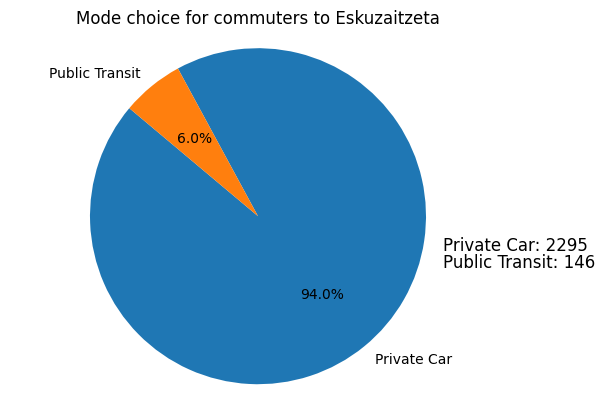

In [ ]:
x = np.array(trips)
y_pred = model.predict(x)
y_pred

import matplotlib.pyplot as plt

# Contar la frecuencia de cada tipo de valor
from collections import Counter
value_counts = Counter(y_pred)

# Extraer las etiquetas y sus frecuencias
labels, counts = zip(*value_counts.items())

custom_labels = ['Private Car', 'Public Transit']  # Reemplaza estos nombres según tus necesidades

# Crear un gráfico de pastel
plt.pie(counts, labels=custom_labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Para asegurarse de que el gráfico de pastel sea circular
plt.title('Mode choice for commuters to Eskuzaitzeta')

# Agregar el número total de cada categoría
for i, label in enumerate(custom_labels):
    plt.text(1.1, -0.2 - 0.1 * i, f'{label}: {counts[i]}', fontsize=12)

# Mostrar el gráfico
plt.show()